<a href="https://colab.research.google.com/github/bwowby/DS/blob/master/ir-basic/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

### Generate Dataset

feature : 연봉(salaries) / 업무 만족도(satisfaction)   
label : 잔류(stay)

In [6]:
salaries = [5.0, 5.3, 5.1, 5.8, 5.05, 5.0, 5.3, 4.9 ,5.15, 5.05]
salaries = np.array(salaries)

salaries

array([5.  , 5.3 , 5.1 , 5.8 , 5.05, 5.  , 5.3 , 4.9 , 5.15, 5.05])

In [7]:
satisfaction = [3,7,4,9,8,6,5,4,6,7]
satisfaction = np.array(satisfaction)

satisfaction

array([3, 7, 4, 9, 8, 6, 5, 4, 6, 7])

In [8]:
stay = [False, True, False, True, True, True, True, False,True, True]
stay = np.array(stay)

stay

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True])

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
example = pd.DataFrame({'연봉' : salaries, '업무 만족도' : satisfaction, '잔류': stay})
example

,연봉,업무 만족도,잔류
0,5.00,3,False
1,5.30,7,True
2,5.10,4,False
3,5.80,9,True
4,5.05,8,True
5,5.00,6,True
6,5.30,5,True
7,4.90,4,False
8,5.15,6,True
9,5.05,7,True


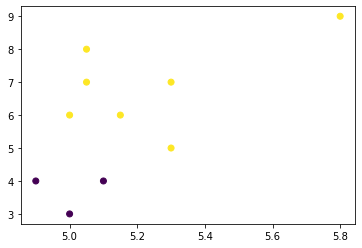

In [16]:
#sactter chart : scatter(x, y, c=df[x][y]label)
plt.scatter(salaries, satisfaction, c=stay)

2.14
### Deafine Sigmoid 
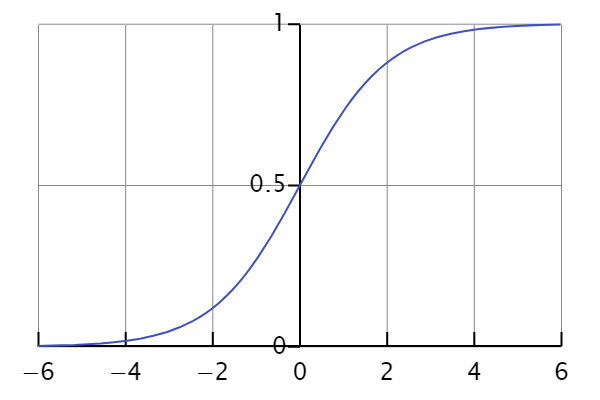

In [18]:
# 1/1+e^(-x)
def sigmoid(x) :
  return 1 / (1 + np.exp(-x))

In [20]:
sigmoid(6)

0.9975273768433653

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


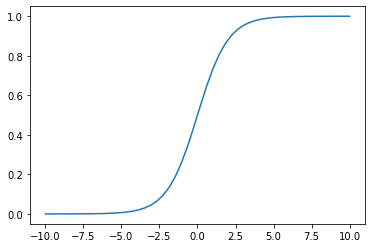

In [25]:
# numpy 범위 내에서 default 50 개로 쪼개줌
xx = np.linspace(-10,10)
print(xx)
yy = sigmoid(xx)

# 단순 x,y plot(x,y)
plt.plot(xx,yy)


### Gradient Descent

In [26]:
x1 = salaries
x2 = satisfaction 
x1, x2


(array([5.  , 5.3 , 5.1 , 5.8 , 5.05, 5.  , 5.3 , 4.9 , 5.15, 5.05]),
 array([3, 7, 4, 9, 8, 6, 5, 4, 6, 7]))

In [28]:
y = stay
y

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True])

In [57]:
num_epoch = 100
learning_rate = 1.0

# x가 두개니까 w도 두개
w1 = np.random.uniform(low = -1.0, high = +1.0)
w2 = np.random.uniform(low = -1.0, high = +1.0)
b = np.random.uniform(low = -1.0, high = +1.0)

for epoch in  range(num_epoch) :
  y_predict = w1*x1 + w2*x2 + b
  #0~1사이 값으로 나옴
  y_predict = sigmoid(y_predict)

  predict = y_predict > 0.5
  accuracy = (predict == y).mean()

  if epoch % 10 == 0:
    print(f"epoch : {epoch} accuracy : {accuracy:.6f}")

  # 100퍼면 그만 반복하고 끝
  if accuracy == 1.0 : 
    break;
  #cost function 편미분한 값
  w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
  w2 = w2 - learning_rate * ((y_predict- y) * x2).mean()
  b = b - learning_rate * (y_predict - y).mean()

print("----"*10)
print(f"epoch : {epoch} accuracy : {accuracy:.6f}")

epoch : 0 accuracy : 0.100000
epoch : 10 accuracy : 0.900000
epoch : 20 accuracy : 0.800000
epoch : 30 accuracy : 0.800000
----------------------------------------
epoch : 36 accuracy : 1.000000


### Predict

In [64]:
y_predict = w1*x1 + w2*x2 + b
y_predict = sigmoid(y_predict)

predict = y_predict > 0.5

result = example.copy()
result["잔류(예측)"] = predict
result["잔류(확률)"] = y_predict

result

,연봉,업무 만족도,잔류,잔류(예측),잔류(확률)
0,5.00,3,False,False,0.006951
1,5.30,7,True,True,0.999992
2,5.10,4,False,False,0.294885
3,5.80,9,True,True,1.000000
4,5.05,8,True,True,1.000000
5,5.00,6,True,True,0.999772
6,5.30,5,True,True,0.945811
7,4.90,4,False,False,0.461535
8,5.15,6,True,True,0.999609
9,5.05,7,True,True,0.999997


### Visualization

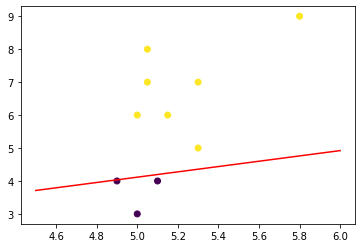

In [68]:
xx = np.linspace(start = 4.5, stop = 6.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.scatter(x1,x2,c=y)
plt.plot(xx,yy,c='r')